# Assignment 2
## Author: Lei Cao

In [ ]:
import numpy as np
import pandas as pd

from numpy import arange
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree

### Q1: Intro
#### 1. Read in the data
#### 2. Set the random seed to '123': Do this all of over your script to ensure reproducibility
#### 3. Shuffle the rows in your dataset
#### 4. Recode the target variable (overwrite the column) to be binary (If greater than median, give it a '1', otherwise give it a '0')

In [ ]:
# Read in the dataset
df = pd.read_csv('~/500Cities_Data.csv')
print(df.shape)
df.head()

(500, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [ ]:
# Drop any rows with NA
df = df.dropna()
print(df.shape)
df.head()

(453, 34)


,Unnamed: 0,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,Geolocation
0,1,CA,Folsom,624638,72203,7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8,"(38.67504943280, -121.147605753)"
1,2,FL,Largo,1239425,77648,19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3,"(27.90909077340, -82.7714203383)"
2,3,CA,Berkeley,606000,112580,7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7,"(37.87256787650, -122.274907975)"
3,4,CA,Napa,650258,76915,12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2,"(38.29804246490, -122.301093331)"
4,5,FL,Sunrise,1269700,84439,22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2,"(26.15468783030, -80.2998411020)"


In [ ]:
# Recode the target variable
df['Flag_Population'] = (df['Population2010'] > np.median(df['Population2010'])) * 1
print(df.shape)
print(df.groupby('Flag_Population').size())

(453, 35)
Flag_Population
0    227
1    226
dtype: int64


In [ ]:
# Prepare data
array = df.values
X = array[:, 5:33]
Y = array[:, 34]

In [ ]:
X = X.astype(float)
Y = Y.astype(int)

In [ ]:
# Split-out validation dataset
validation_size = 0.20
seed = 123
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

### Q2: Spot-checking and k-fold cross-validation
#### 1. Update the models to use all of these:
##### 1) GradientBoostingClassifier()
##### 2) DecisionTreeClassifier()
##### 3) RandomForestClassifier()
##### 4) LinearDiscriminantAnalysis()
##### 5) LogisticRegression()
##### 6) KNeighborsClassifier()
##### 7) GaussianNB()
##### 8) ExtraTreesClassifier()
##### 9) BaggingClassifier()
#### 2. Use a 20-fold cross-validation on the data, which model performs the best?
#### 3. For the algorithm that performs the best, run the model on all training data and predict the holdout data. Call this Model1
#### 4. Try some hyperparameter tuning on that algorithm

In [ ]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 20
seed = 123
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(max_iter=1000000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ET', ExtraTreesClassifier(random_state=seed)))
models.append(('BC', BaggingClassifier(random_state=seed)))

In [ ]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GB: 0.591813 (0.136998)
CART: 0.572661 (0.126690)
RF: 0.601901 (0.131655)
LDA: 0.572368 (0.092556)
LR: 0.564181 (0.099808)
KNN: 0.535819 (0.121036)
NB: 0.580409 (0.123323)
ET: 0.544006 (0.088271)
BC: 0.535819 (0.116878)


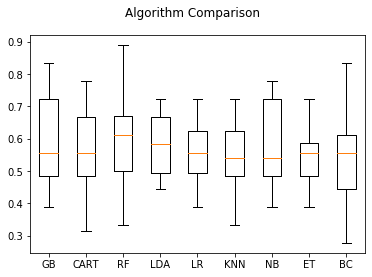

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# According to the results above and the following boxplots, the LinearDiscriminantAnalysis model performs the best

In [ ]:
# Make predictions on validation dataset
Model1 = LinearDiscriminantAnalysis()
Model1.fit(X_train, Y_train)
predictions = Model1.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4945054945054945
[[18 26]
 [20 27]]
              precision    recall  f1-score   support

           0       0.47      0.41      0.44        44
           1       0.51      0.57      0.54        47

    accuracy                           0.49        91
   macro avg       0.49      0.49      0.49        91
weighted avg       0.49      0.49      0.49        91



In [ ]:
# Since the best model I choose is linear discriminant analysis, it has no hyperparameters to tune